In [15]:
# Preprocess File also can open form
# https://drive.google.com/drive/folders/1EHNbRgvWR8Ssj4489ciVBgAMswLw_WEb?usp=sharing

In [2]:
import os
from glob import glob
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
FOLDER_PATH = '/content/drive/MyDrive/EEG/DEAP/data_preprocessed_python/'
files_list = sorted(glob(FOLDER_PATH + '*'))

In [5]:
features = []
targets = []

for i, f in (enumerate(tqdm(files_list))): 
    with open(f, 'rb') as f: 
        content = pickle.load(f, encoding='latin1')
        data = content['data']
        labels = content['labels']
        
        n_clips, n_channels, len_features = data.shape
        
        for j in range(n_clips):
            features.append(data[j])
            targets.append(labels[j])

features = np.array(features) 
targets = np.array(targets)  

100%|██████████| 32/32 [00:48<00:00,  1.52s/it]


In [6]:
eeg_channels = np.array(["Fp1", "AF3", "F3", "F7", "FC5", "FC1", "C3", "T7", "CP5", "CP1", "P3", "P7", "PO3", "O1", "Oz", "Pz", "Fp2", "AF4", "Fz", "F4", "F8", "FC6", "FC2", "Cz", "C4", "T8", "CP6", "CP2", "P4", "P8", "PO4", "O2"])
peripheral_channels = np.array(["hEOG", "vEOG", "zEMG", "tEMG", "GSR", "Respiration belt", "Plethysmograph", "Temperature"])

In [7]:
important = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'P3', 'P4']
eeg_channel = eeg_channels.tolist()
fl_chan = []
for chan in  important:
  if chan in eeg_channel:
    fl_chan.append(eeg_channel.index(chan))
fl_chan

[1, 3, 2, 4, 7, 11, 13, 31, 29, 25, 21, 19, 20, 17, 10, 28]

In [8]:
eeg_data = []
for i in range (len(features)):
  for j in range (len(eeg_channels)):
    eeg_data.append(features[i,j])
eeg_data = np.reshape(eeg_data, (len(features), len(eeg_channels), len(features[0,0])))
print(eeg_data.shape)

#np.save('targets', targets)
#np.save('features', features)

(1280, 32, 8064)


In [10]:
!pip install mne
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
from mne.time_frequency import psd_welch
from mne.decoding import cross_val_multiscore

In [12]:
stft_data = np.zeros([1280,32,129,63])

for i in range(stft_data.shape[0]):
  xx = mne.time_frequency.stft(eeg_data[i],wsize=256);
  stft_data[i] = xx

Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of frequencies: 129
Number of time steps: 63
Number of fr

In [13]:
#np.save('stft_data',stft_data)

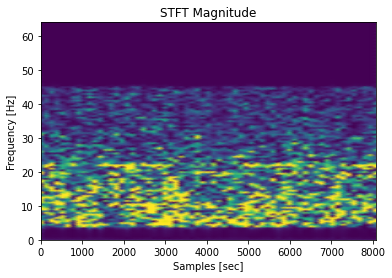

In [14]:
xp = stft_data[0] 
xp[0].shape
from scipy import signal
plt.pcolormesh(np.linspace(0, 8064 , num= xp.shape[2]),
               np.linspace(0, 64 , num= xp.shape[1]),
               np.abs(xp[0])
               ,vmin=0, 
               vmax=4, 
               shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Samples [sec]')
plt.show()